In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [15]:
df = pd.read_csv("../lemmatized_df.csv")

df.drop("Unnamed: 0", axis = 1, inplace = True)

In [16]:
df

,headline,is_sarcastic
0,former versace store clerk sue over secret ' b...,0
1,the ' roseanne ' revival catch up to our thorn...,0
2,mom start to fear son 's web series close thin...,1
3,"boehner just want wife to listen , not come up...",1
4,j.k . rowling wish snape happy birthday in the...,0
...,...,...
26704,american politic in moral free - fall,0
26705,america 's good 20 hike,0
26706,reparation and obama,0
26707,israeli ban target boycott supporter raise ala...,0


In [17]:
X = df["headline"]
y = df["is_sarcastic"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
y_train.value_counts()

is_sarcastic
0    11978
1     9389
Name: count, dtype: int64

In [23]:
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), y_train)

In [24]:
y_train.value_counts()

is_sarcastic
1    11978
0    11978
Name: count, dtype: int64

# KNN

              precision    recall  f1-score   support

           0       0.59      0.81      0.69      3007
           1       0.54      0.28      0.37      2335

    accuracy                           0.58      5342
   macro avg       0.57      0.55      0.53      5342
weighted avg       0.57      0.58      0.55      5342



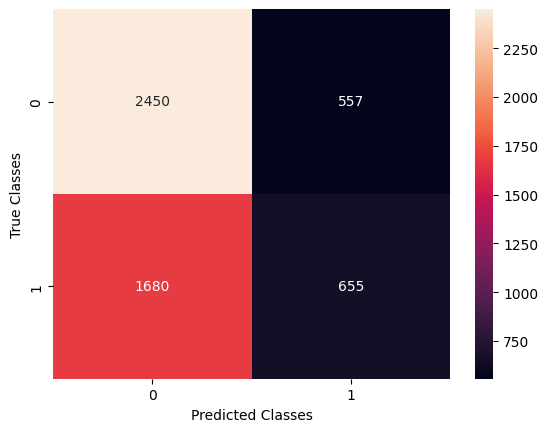

In [31]:
knn_classifier_pipeline = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 3))),
    ("knn_classifier", KNeighborsClassifier())
])

knn_classifier_pipeline.fit(X_train.squeeze(), y_train)

predictions = knn_classifier_pipeline.predict(X_test)

print(classification_report(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

# Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3007
           1       0.83      0.82      0.83      2335

    accuracy                           0.85      5342
   macro avg       0.85      0.85      0.85      5342
weighted avg       0.85      0.85      0.85      5342



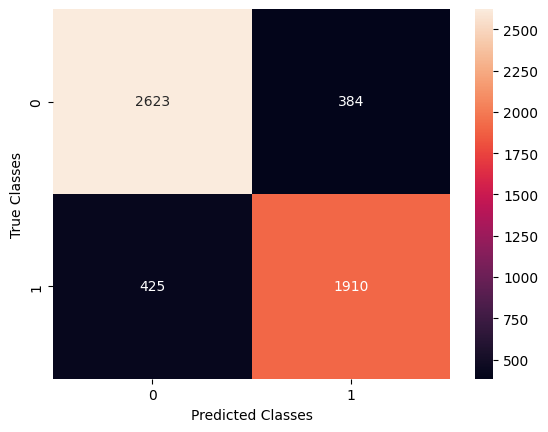

In [38]:
naive_bayes_classifier_pipeline = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 3))),
    ("naive_bayes_classifier", MultinomialNB())
])

naive_bayes_classifier_pipeline.fit(X_train.squeeze(), y_train)

predictions = naive_bayes_classifier_pipeline.predict(X_test)

print(classification_report(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3007
           1       0.76      0.83      0.79      2335

    accuracy                           0.81      5342
   macro avg       0.81      0.81      0.81      5342
weighted avg       0.81      0.81      0.81      5342



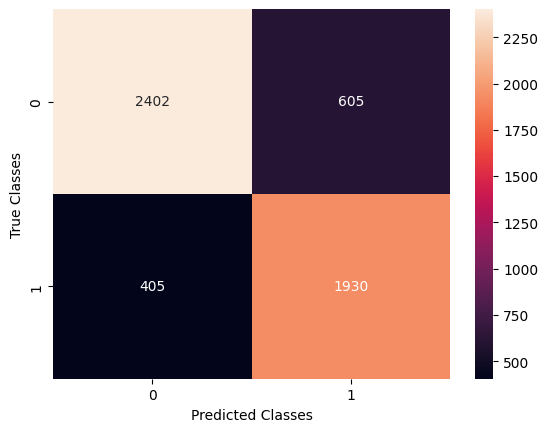

In [40]:
random_forest_classifier_pipeline = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 3))),
    ("random_forest_classifier", RandomForestClassifier())
])

random_forest_classifier_pipeline.fit(X_train.squeeze(), y_train)

predictions = random_forest_classifier_pipeline.predict(X_test)

print(classification_report(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

# SVM

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3007
           1       0.84      0.81      0.82      2335

    accuracy                           0.85      5342
   macro avg       0.85      0.84      0.84      5342
weighted avg       0.85      0.85      0.85      5342



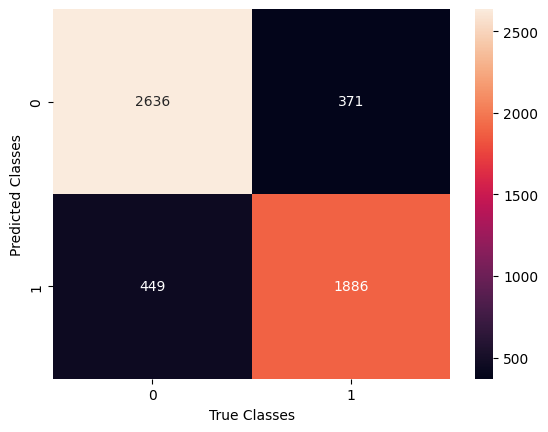

In [63]:
svm_classifier_pipeline = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 3))),
    ("random_forest_classifier", SVC(kernel='linear'))
])

svm_classifier_pipeline.fit(X_train.squeeze(), y_train)

predictions = svm_classifier_pipeline.predict(X_test)

print(classification_report(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("True Classes")
plt.ylabel("Predicted Classes")
plt.show()

In [61]:
naive_bayes_classifier_pipeline.predict(["he is so smart that he can achieve A grade in even the most difficult"])

array([0], dtype=int64)

In [42]:
joblib.dump(naive_bayes_classifier_pipeline, "./naive_bayes_classifier.pkl")

['./naive_bayes_classifier.pkl']

In [64]:
# joblib.dump(svm_classifier_pipeline, "./naive_bayes_classifier.pkl")

['./naive_bayes_classifier.pkl']

In [2]:
model = joblib.load("./naive_bayes_classifier.pkl")

In [10]:
model.predict(["science - fiction novel posit future where character be hastily sketch"])

array([1], dtype=int64)